# Visualizations with R and ggplot2
#### Examining Scatter and Deviation plots

## 1. Scatterplot
* understand the relationship between 2 variables
* using geom_point( )
* using geom_smooth( ) - draws a smoothing line (method='lm' - for best fit line)

also installing the dependencies ‘backports’, ‘zeallot’, ‘colorspace’, ‘assertthat’, ‘utf8’, ‘vctrs’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘cli’, ‘fansi’, ‘pillar’, ‘pkgconfig’, ‘gtable’, ‘lazyeval’, ‘plyr’, ‘reshape2’, ‘rlang’, ‘scales’, ‘tibble’, ‘viridisLite’




The downloaded binary packages are in
	/var/folders/fn/10dyfg195751k6kfky4t_j7r0000gn/T//RtmpeqaDZ0/downloaded_packages


Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”
Attaching package: ‘ggplot2’

The following object is masked _by_ ‘.GlobalEnv’:

    midwest

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

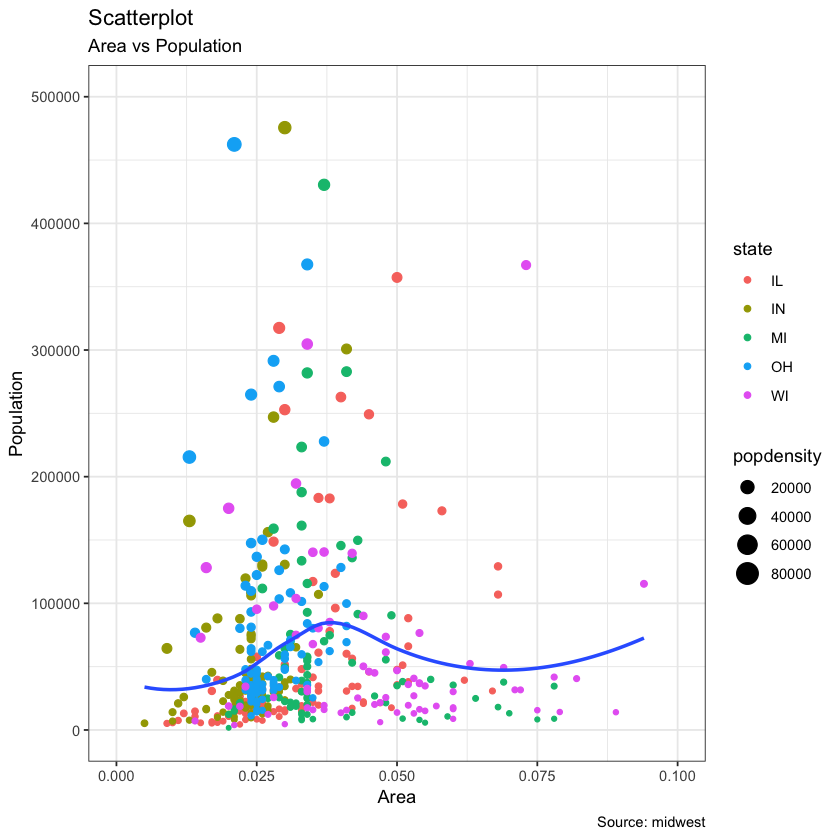

In [2]:
install.packages("ggplot2")
midwest <- read.csv("http://goo.gl/G1K41K")

options(scipen=999)
library(ggplot2)
theme_set(theme_bw())
data("midwest", package = "ggplot2")

gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
    geom_point(aes(col=state, size=popdensity)) +
    geom_smooth(method="loess", se=F) +
    xlim(c(0, 0.1)) +
    ylim(c(0, 500000)) +
    labs(subtitle="Area vs Population",
        y="Population",
        x="Area",
        title="Scatterplot",
        caption="Source: midwest")
    
plot(gg)

## Jitter Plot

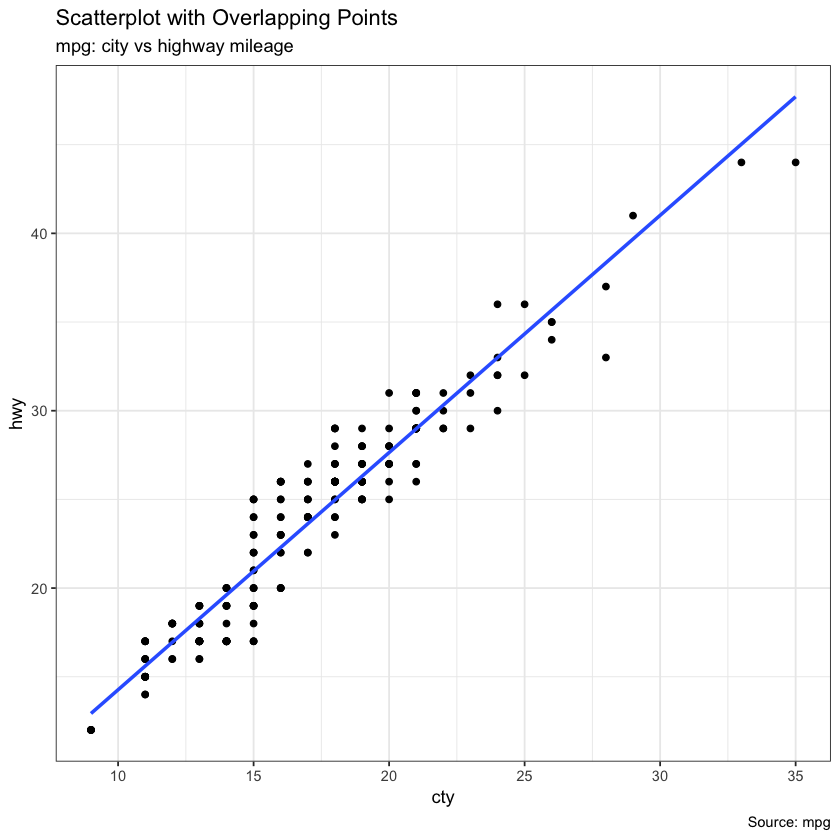

In [6]:
mpg <- read.csv("http://goo.gl/uEeRGu")

library(ggplot2)
data(mpg, package="ggplot2")
theme_set(theme_bw())

g <- ggplot(mpg, aes(cty, hwy))

g + geom_point() + 
    geom_smooth(method="lm", se=F) +
    labs(subtitle="mpg: city vs highway mileage",
        y="hwy",
        x="cty",
        title="Scatterplot with Overlapping Points",
        caption="Source: mpg")

In [7]:
dim(mpg)

[1] 234  11

* the scatterplot seems to hide many of the 234 data points, as they are overlapped
* this can be addressed using jitter_geom( )
* points will be 'jittered' around the original position randomly, by a given width

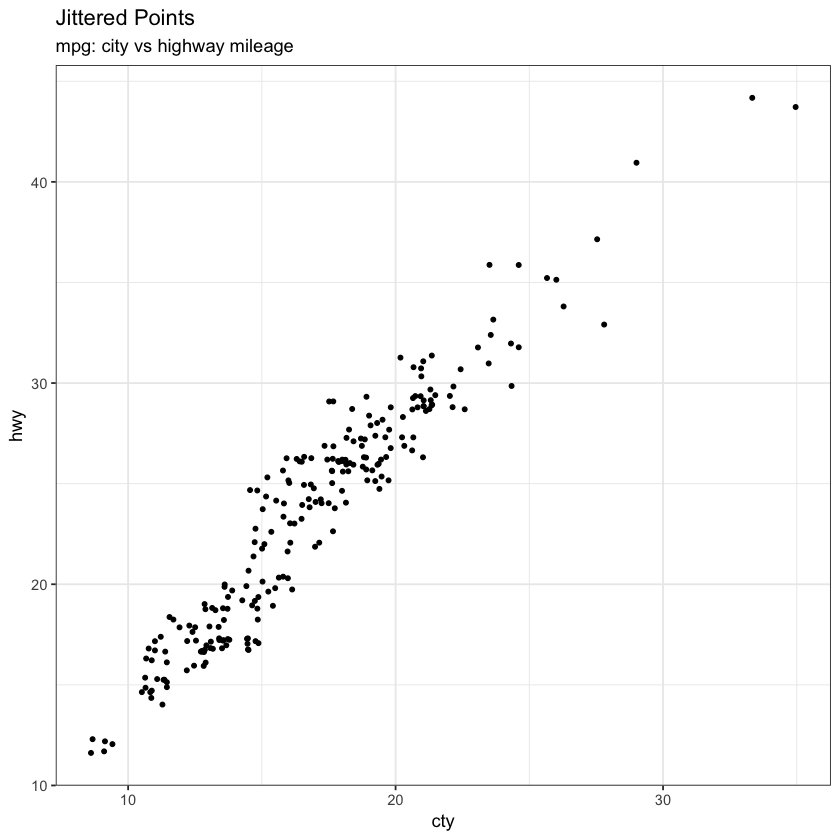

In [8]:
library(ggplot2)
data(mpg, package="ggplot2")

theme_set(theme_bw())
g <- ggplot(mpg, aes(cty, hwy))
g + geom_jitter(width=.5, size=1) +
    labs(subtitle="mpg: city vs highway mileage",
        y="hwy",
        x="cty",
        title="Jittered Points")

## Counts Chart
* another way to address overlapping points - using geom_count( )
* where points overlap, the point size increases

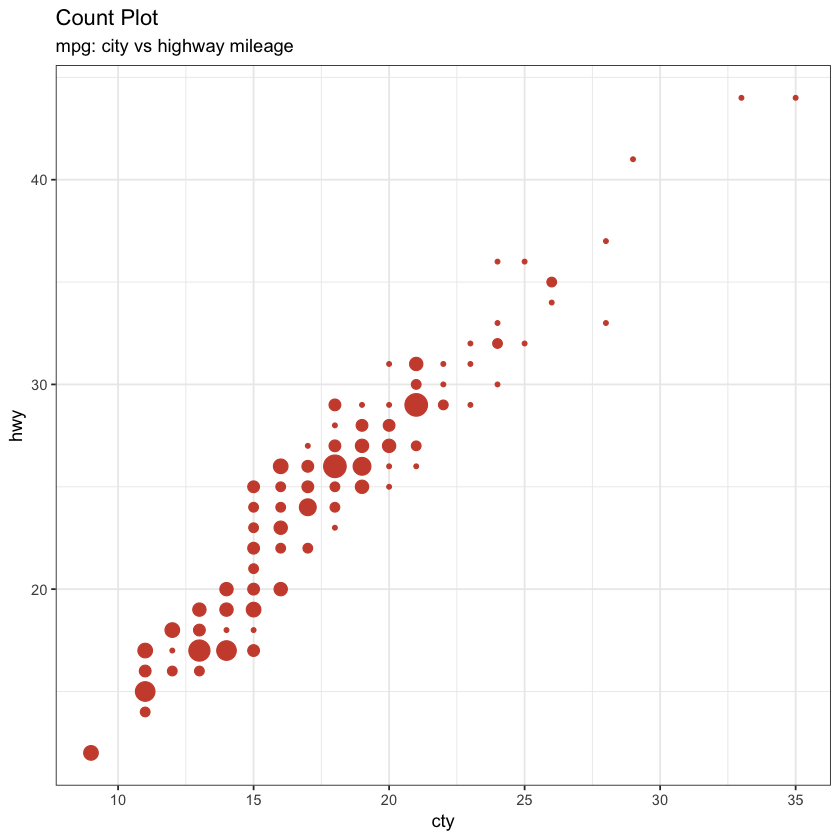

In [9]:
library(ggplot2)
data(mpg, package="ggplot2")

theme_set(theme_bw())
g <- ggplot(mpg, aes(cty, hwy))
g + geom_count(col="tomato3", show.legend=F) +
    labs(subtitle="mpg: city vs highway mileage",
        y="hwy",
        x="cty",
        title="Count Plot")

## Bubble Plot
* good for looking at the relationship between a Categorical variable and a continuous variable
* good for 4-D data - with a numeric X and Y, a Categorical (color) variable, and a numeric (size) variable

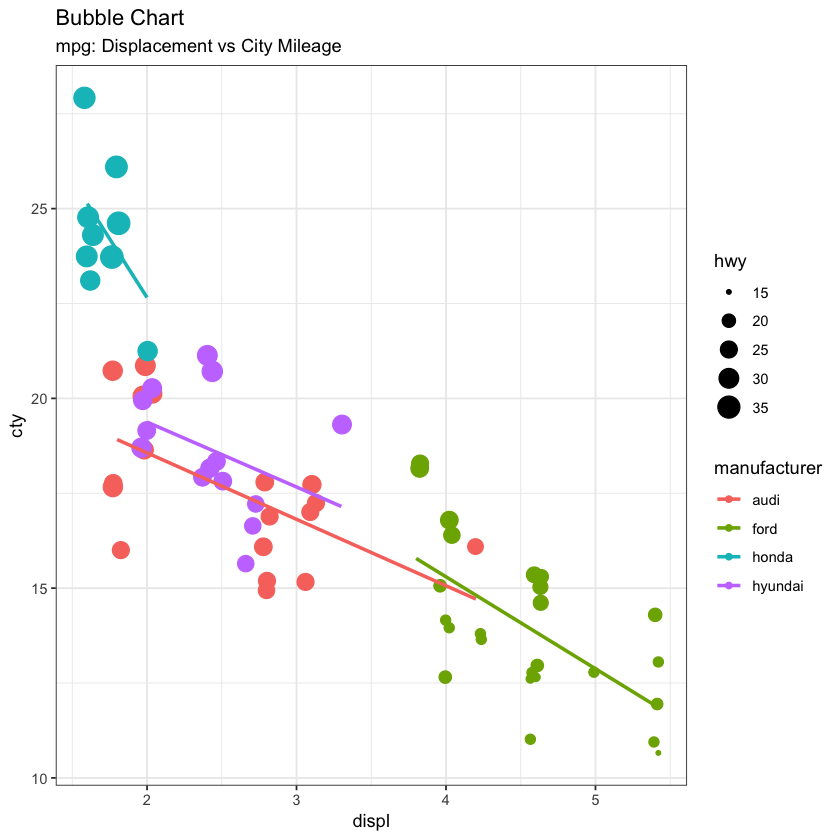

In [11]:
library(ggplot2)
data(mpg, package="ggplot2")

mpg_select <- mpg[mpg$manufacturer %in% c("audi", "ford", "honda", "hyundai"),]

theme_set(theme_bw())
g <- ggplot(mpg_select, aes(displ, cty)) +
    labs(subtitle="mpg: Displacement vs City Mileage",
        title="Bubble Chart")

g + geom_jitter(aes(col=manufacturer, size=hwy)) +
    geom_smooth(aes(col=manufacturer), method="lm", se=F)

## Marginal Histogram / Boxplot
* when wanting to show the relationship as well as the distribution
* places a histogram of X and Y, at the margins
* use ggMarginal( )

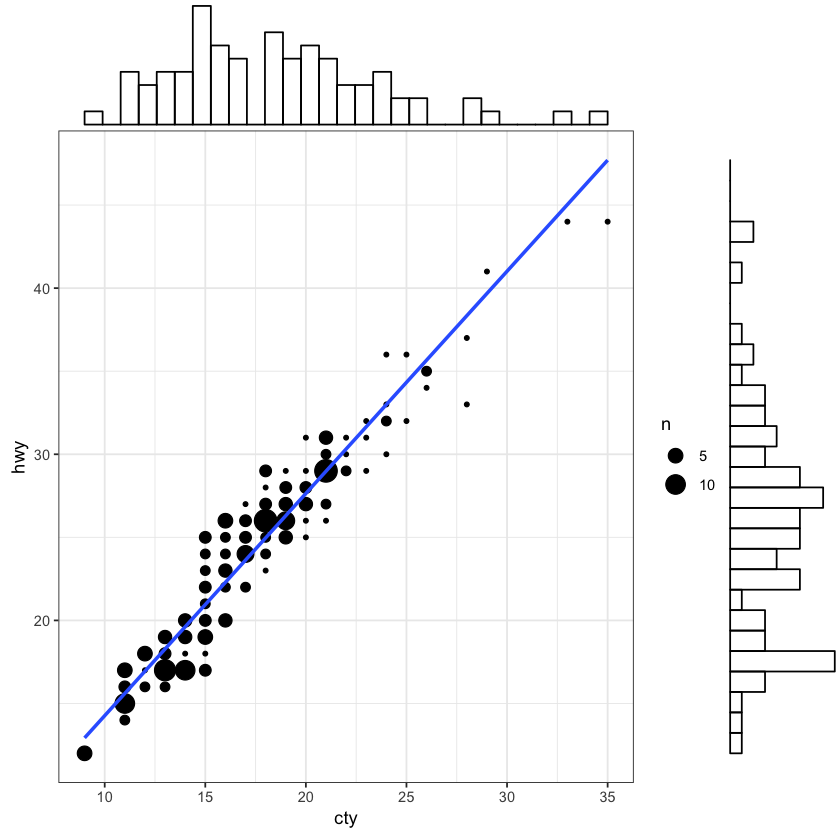

In [17]:
library(ggplot2)
library(ggExtra)
data(mpg, package="ggplot2")

theme_set(theme_bw())
mpg_select <- mpg[mpg$hwy >= 35 & mpg$cty >27, ]
g<- ggplot(mpg, aes(cty, hwy)) +
    geom_count() +
    geom_smooth(method="lm", se=F)

ggMarginal(g, type="histogram", fill="transparent")

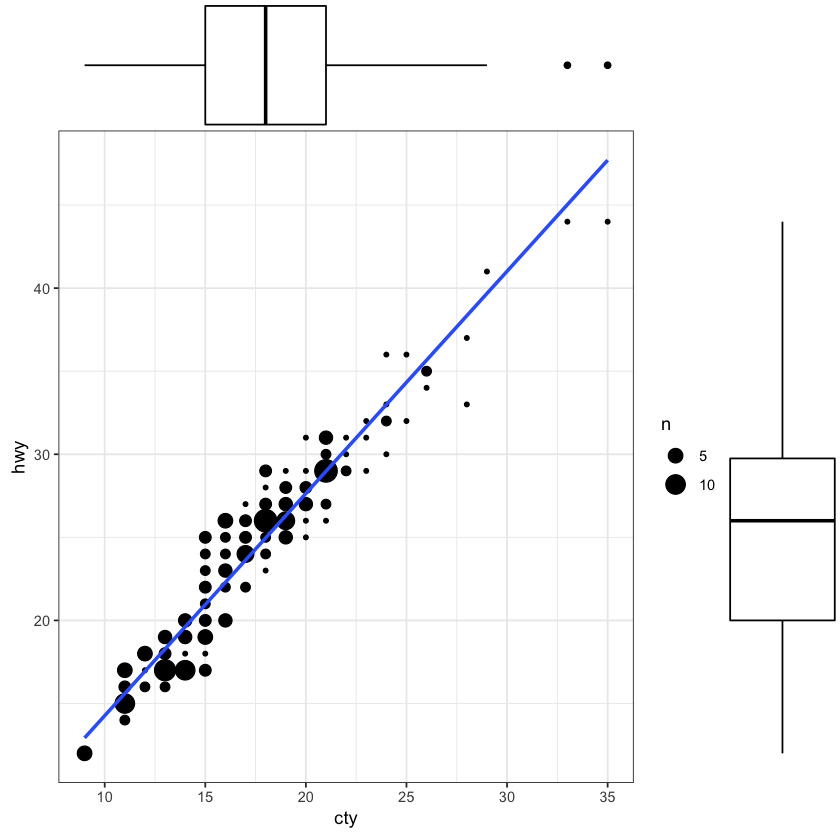

In [16]:
ggMarginal(g, type="boxplot", fill="transparent")

## Correlogram
* examine correlation between 2 continuous variables
* use the ggcorrplot package

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“EOF within quoted string”

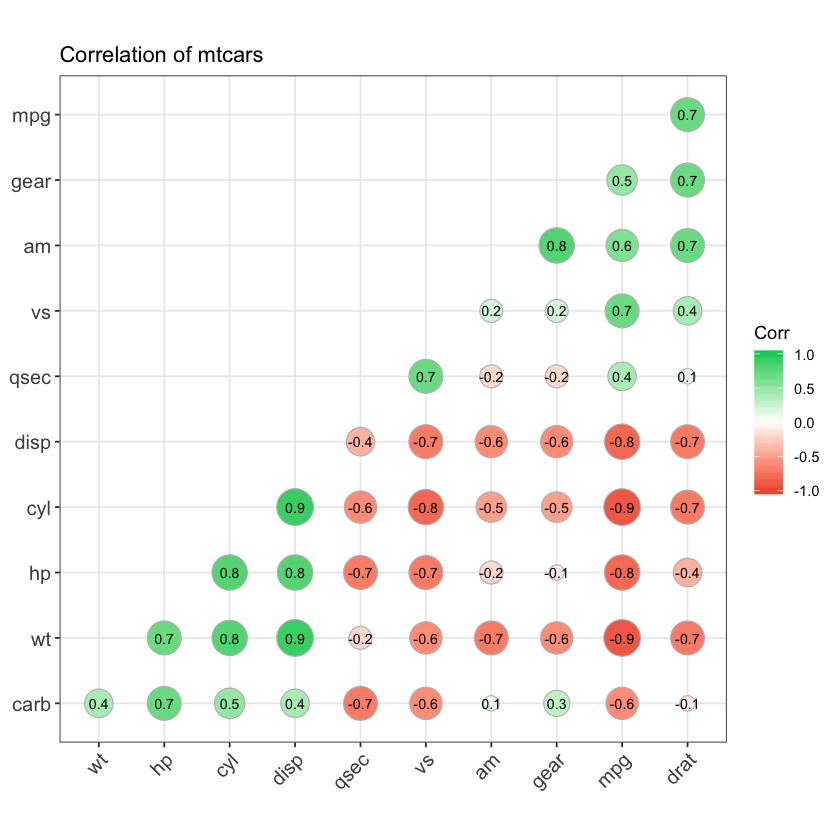

In [20]:
library(ggplot2)
library(ggcorrplot)

mtcars <- read.csv("https://gist.github.com/seankross/a412dfbd88b3db70b74b")

data(mtcars)
corr <- round(cor(mtcars), 1)

ggcorrplot(corr, hc.order=TRUE,
          type="lower",
          lab=TRUE,
          lab_size=3,
          method="circle",
          colors=c("tomato2", "white", "springgreen3"),
          title="Correlation of mtcars",
          ggtheme=theme_bw)

# 2. Deviation
#### These graphs compare the Variation of values between a number of items/categories - with respect to a fixed reference
## Diverging Bars
* bar chart - handling negative and positive values
* geom_bar( ) - produces a historgram (by default), and a bar chart
    * for bar chart - set stat=identity
    * provide x (character/factor) AND y (numeric)
* categorical variable needed 2 categories (that change +/- at a certain threshold)

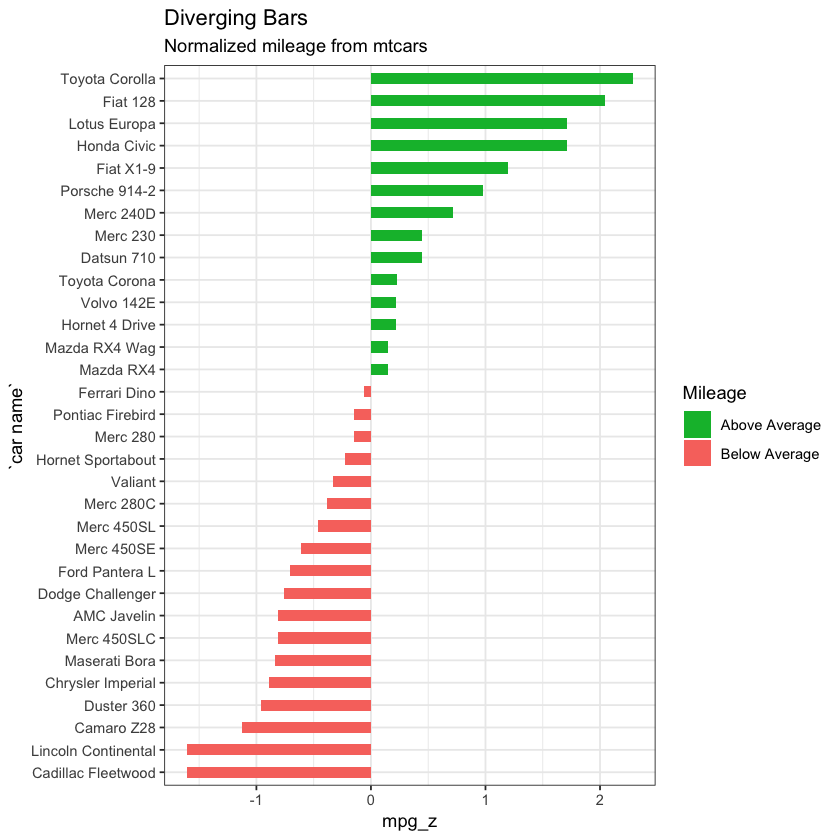

In [23]:
library(ggplot2)
theme_set(theme_bw())

data(mtcars)

mtcars$`car name` <- rownames(mtcars)
mtcars$mpg_z <- round((mtcars$mpg - mean(mtcars$mpg))/sd(mtcars$mpg), 2)
mtcars$mpg_type <- ifelse(mtcars$mpg_z < 0, "below", "above")

mtcars <- mtcars[order(mtcars$mpg_z), ]
mtcars$`car name` <- factor(mtcars$'car name', levels=mtcars$'car name')

ggplot(mtcars, aes(x=`car name`, y=mpg_z, label=mpg_z)) +
    geom_bar(stat='identity', aes(fill=mpg_type), width=.5) +
    scale_fill_manual(name="Mileage",
                    labels=c("Above Average", "Below Average"),
                    values=c("above"="#00ba38", "below"="#f8766d")) +
    labs(subtitle="Normalized mileage from mtcars",
         title="Diverging Bars") +
    coord_flip()

## Diverging Lollipop Chart
* modern take on bar chart and diverging bar
* uses geom_point( ) and geom_segment( ) - for lollipops

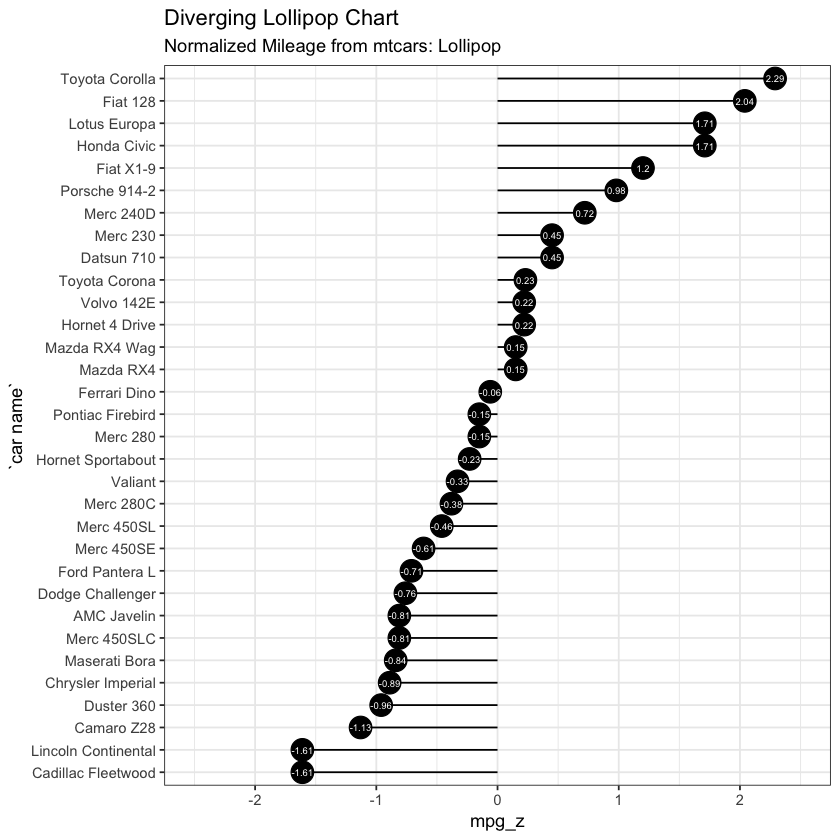

In [25]:
library(ggplot2)
theme_set(theme_bw())

ggplot(mtcars, aes(x=`car name`, y=mpg_z, label=mpg_z)) +
    geom_point(stat='identity', fill="black", size=6) +
    geom_segment(aes(y = 0,
                    x = `car name`,
                    yend = mpg_z,
                    xend = `car name`),
                color = "black") +
    geom_text(color = "white", size = 2) +
    labs(title = "Diverging Lollipop Chart",
         subtitle = "Normalized Mileage from mtcars: Lollipop") +
    ylim(-2.5, 2.5) +
    coord_flip()

## Diverging Dot Plot
* similar as above, except using only points

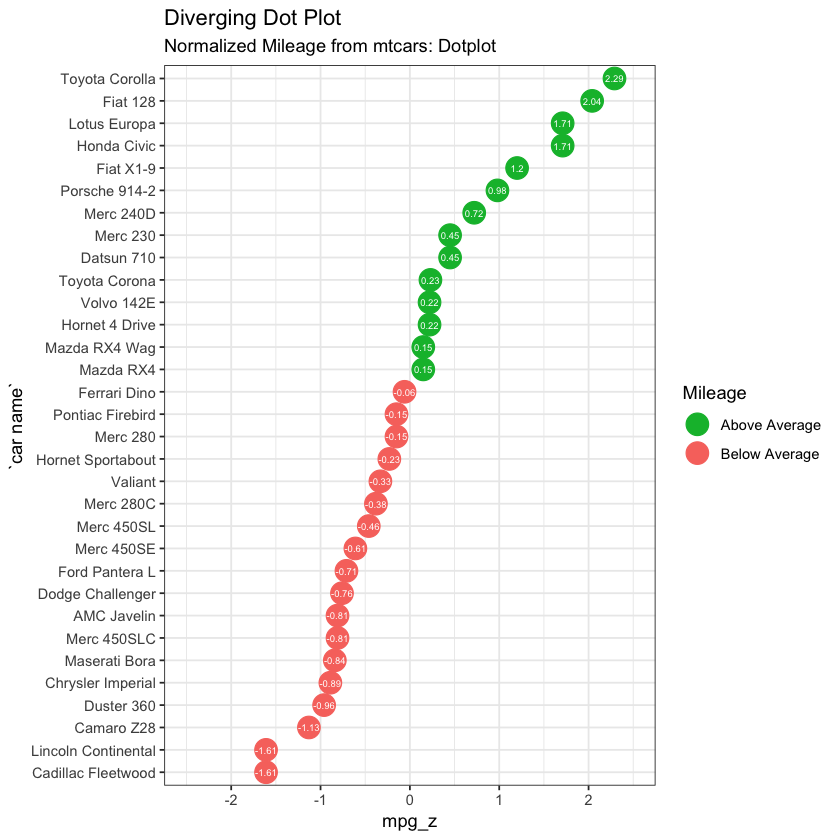

In [26]:
library(ggplot2)
theme_set(theme_bw())

ggplot(mtcars, aes(x=`car name`, y=mpg_z, label=mpg_z)) +
    geom_point(stat='identity', aes(col=mpg_type), size=6) +
    scale_color_manual(name="Mileage",
                      labels=c("Above Average", "Below Average"),
                      values=c("above"="#00ba38", "below"="#f8766d")) +
    geom_text(color="white", size=2) +
    labs(title="Diverging Dot Plot",
        subtitle="Normalized Mileage from mtcars: Dotplot") +
    ylim(-2.5,2.5) +
    coord_flip()